In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_squared_error

In [2]:
file_path = "insurance.csv"
df = pd.read_csv(file_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
for col in ['sex','smoker','region']:
    df[col] = LabelEncoder().fit_transform(df[col])
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [9]:
X = df.drop('charges',axis=1)
y = df['charges']
X = StandardScaler().fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

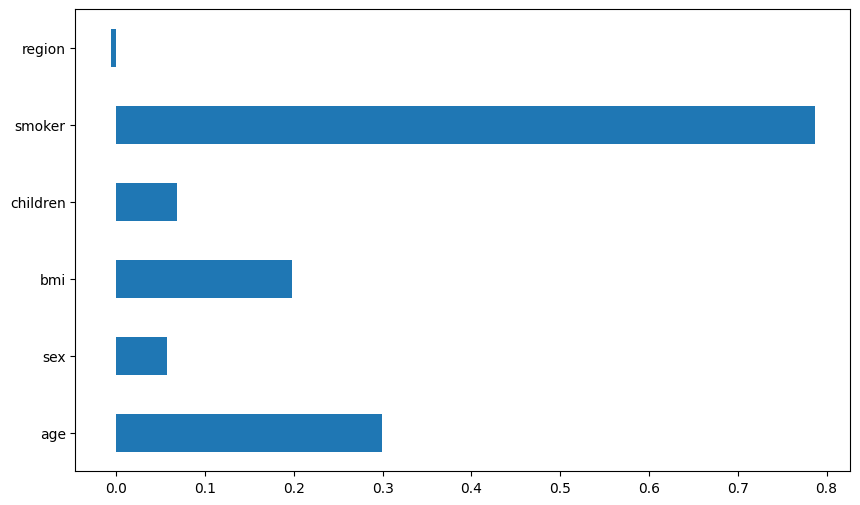

In [ ]:
corr_vals = df.corr()['charges'].drop('charges')
corr_vals.plot(kind='barh',figsize=(10,6))
plt.show()

In [12]:
rt = DecisionTreeRegressor(criterion='squared_error',max_depth=8,random_state=42)

In [ ]:
rt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [14]:
y_pred = rt.predict(X_test)

In [15]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(5699.065187246365)

In [ ]:
rt.score(X_test,y_test)

0.7847498264505394

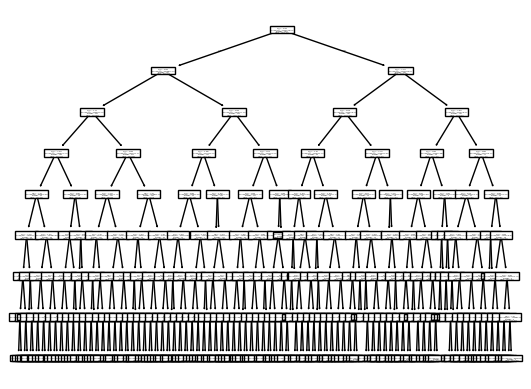

In [17]:
plot_tree(rt)
plt.show()